# Question 3.1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

import os
os.chdir("C:/Users/\Callu/OneDrive/Documents/FINAL YEAR/Data Science/Final Project/data")

covid = pd.read_csv('owid-covid-data.csv')

In [2]:
covid_vis = covid[covid.iso_code.isin(["GBR", "USA","IND"])]
covid_vis

covid_vis.loc[:,'date'] = pd.to_datetime(covid_vis.loc[:,'date'])

basedate = pd.Timestamp('2020-01-01')
covid_vis.loc[:,'time_since'] = (covid_vis['date'] - basedate).dt.days

C:\Users\Callu\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Callu\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [3]:
chart = covid_vis.iloc[:,[0,10,11,12,59]]
chart

c1 = chart.loc[chart.iso_code=='IND', 'total_cases_per_million']
c2 = chart.loc[chart.iso_code=='GBR', 'total_cases_per_million']
c3 = chart.loc[chart.iso_code=='USA', 'total_cases_per_million']

c4 = chart.loc[chart.iso_code=='IND', 'new_cases_per_million']
c5 = chart.loc[chart.iso_code=='GBR', 'new_cases_per_million']
c6 = chart.loc[chart.iso_code=='USA', 'new_cases_per_million']

c7 = chart.loc[chart.iso_code=='IND', 'new_cases_smoothed_per_million']
c8 = chart.loc[chart.iso_code=='GBR', 'new_cases_smoothed_per_million']
c9 = chart.loc[chart.iso_code=='USA', 'new_cases_smoothed_per_million']

x1 = chart.loc[chart.iso_code=='IND', 'time_since']
x2 = chart.loc[chart.iso_code=='GBR', 'time_since']
x3 = chart.loc[chart.iso_code=='USA', 'time_since']

In [4]:
# Set line markers for dates
covid_vis.loc[covid_vis['date'] == '2020-03-23']

covid_vis.loc[covid_vis['date'] == '2020-11-01']

covid_vis.loc[covid_vis['date'] == '2021-01-05']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,time_since
31882,IND,Asia,India,2021-01-05,10374932.0,18088.0,18582.857,150114.0,264.0,239.286,...,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645,370
72744,GBR,Europe,United Kingdom,2021-01-05,2782713.0,61087.0,56106.571,76428.0,881.0,679.000,...,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,370
73171,USA,North America,United States,2021-01-05,21180814.0,235048.0,221601.857,363752.0,3691.0,2722.857,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,370


In [5]:
# Locate the zero values in Indian Cases
c4.loc[lambda c4: c4 == 0]

31542    0.0
31543    0.0
31546    0.0
31547    0.0
31548    0.0
31549    0.0
31550    0.0
31551    0.0
31552    0.0
31553    0.0
31554    0.0
31555    0.0
31556    0.0
31557    0.0
31558    0.0
31559    0.0
31560    0.0
31561    0.0
31562    0.0
31563    0.0
31564    0.0
31565    0.0
31566    0.0
31567    0.0
31568    0.0
31569    0.0
31570    0.0
31571    0.0
31572    0.0
31574    0.0
31877    0.0
31885    0.0
Name: new_cases_per_million, dtype: float64

In [6]:
# Replace missing data with median of cases
median_c4 = c4.median(skipna=True)
c4.loc[31877] = median_c4
c4.loc[31885] = median_c4

Text(374, 0.001, '2020-01-05')

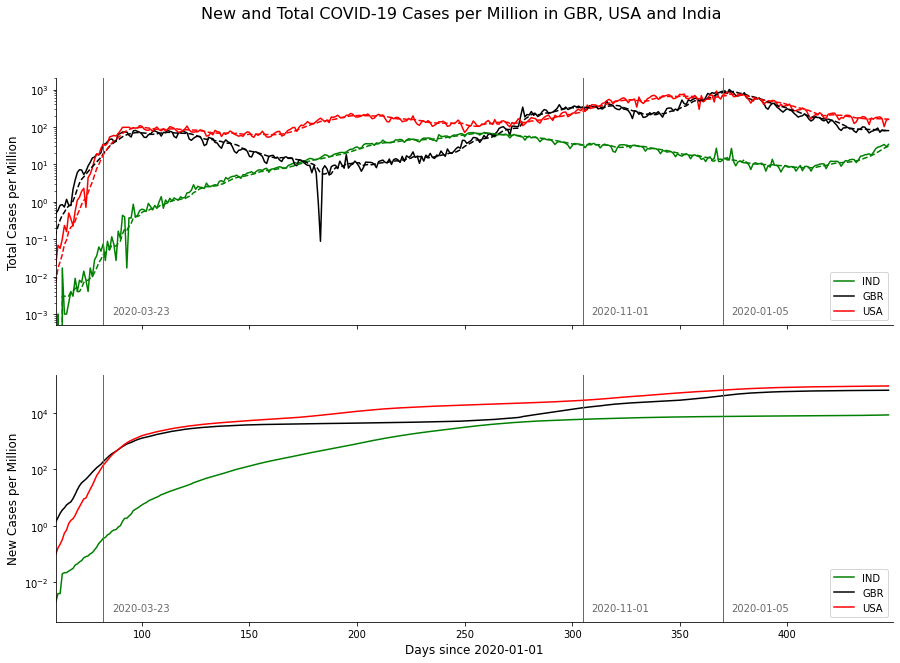

In [7]:
# Create Chart

fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 10), sharex=True)

ax1.plot(x1, c4, color="green", label="IND")
ax1.plot(x2, c5, color="black", label="GBR")
ax1.plot(x3, c6, color="red", label="USA")
ax1.plot(x1, c7, color="green", label="IND", linestyle="dashed")
ax1.plot(x2, c8, color="black", label="GBR", linestyle="dashed")
ax1.plot(x3, c9, color="red", label="USA", linestyle="dashed")

ax2.plot(x1, c1, color="green", label="IND")
ax2.plot(x2, c2, color="black", label="GBR")
ax2.plot(x3, c3, color="red", label="USA")

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim([60, 449])
ax2.set_xlim([60, 449])

# Remove Duplicates in Legend
handles, labels = ax1.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
ax1.legend(handle_list, label_list)


ax2.legend(loc="lower right")

fig.suptitle('New and Total COVID-19 Cases per Million in GBR, USA and India', fontsize=16)
ax2.set_xlabel('Days since 2020-01-01', fontsize=12)
ax2.set_ylabel('New Cases per Million', fontsize=12)
ax1.set_ylabel('Total Cases per Million', fontsize=12)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)

#Set Markers
xcoords = [82, 305, 370]
for xc in xcoords:
    ax1.axvline(x=xc, color='dimgray', linewidth=1)
    ax2.axvline(x=xc, color='dimgray', linewidth=1)

ax1.text(86, 0.001,'2020-03-23', color='dimgray')
ax1.text(309, 0.001,'2020-11-01', color='dimgray')
ax1.text(374, 0.001,'2020-01-05', color='dimgray')

ax2.text(86, 0.001,'2020-03-23', color='dimgray')
ax2.text(309, 0.001,'2020-11-01', color='dimgray')
ax2.text(374, 0.001,'2020-01-05', color='dimgray')

# Question 3.1B

In [8]:
import seaborn as sns

In [9]:
# Drop aggregate indicators
covid = covid[~covid['location'].isin(['World', 'Europe', 'North America', 'Asia', 'European Union', 'South America', 'Africa'])]


# Summaraise Key Variables as only interested in Country aggreation
summed = covid.groupby(['continent','iso_code',"location"])[['new_cases','new_deaths']].sum().reset_index()
mean = covid.groupby(['continent','iso_code',"location"])[['reproduction_rate','gdp_per_capita',
                                                'human_development_index','population',
                                                'population_density','median_age',
                                                'aged_65_older','aged_70_older',
                                                'life_expectancy', 'stringency_index']].mean().reset_index()
# Merge the new variables
merged = pd.merge(summed,mean,on=['continent','iso_code','location'])

In [10]:
# Remove Countries with no data
merged = merged[~merged['gdp_per_capita'].isin(['0.000000e+00'])]
merged = merged[~merged['new_cases'].isin([0])]

# Create new variables
merged['death_rate'] = merged['new_deaths'] / merged['new_cases']
merged['death_rate'] = merged['death_rate'].round(3)
merged['deaths_per_100'] = merged['new_deaths'] / (merged['population'] / 100)

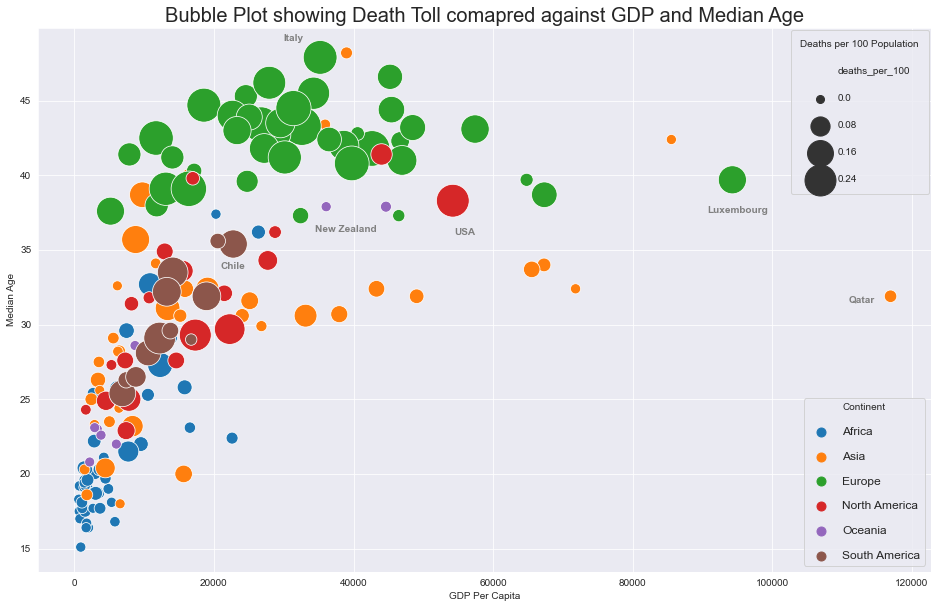

In [11]:
# Convert continent variable to categorical so can be used in Bubble plot
merged['continent']=pd.Categorical(merged['continent'])


# use the scatterplot function to build the bubble map
sns.set_style("darkgrid")
fig, ax1  = plt.subplots(1,1, figsize=(16,10), sharex=False)

axes = sns.scatterplot(data=merged, x="gdp_per_capita", y="median_age", 
                size="deaths_per_100", hue="continent", 
                cmap="Accent", sizes=(100, 1500), ax=ax1)

axes.set(xlabel='GDP Per Capita', ylabel='Median Age')
axes.set_title('Bubble Plot showing Death Toll comapred against GDP and Median Age', fontsize=20)

# Legend split and place outside #
num_of_colors   = len(merged['continent'].unique()) + 1
handles, labels = axes.get_legend_handles_labels()
color_hl = handles[1:num_of_colors], labels[1:num_of_colors]
sizes_hl = handles[num_of_colors:], labels[num_of_colors:]


# Call legend twice #
color_leg = axes.legend(*color_hl,
                        prop={'size': 12},
                        loc = 'lower right',
                        labelspacing=1.2,
                        title='Continent',
                        markerscale=1.5
                        )

sizes_leg = axes.legend(*sizes_hl,
                        loc = 'upper right',
                        prop={'size': 10},
                        labelspacing=1.8,
                        title='Deaths per 100 Population',
                        markerscale=0.8,
                        borderaxespad = 0.2,
                        borderpad = 1,
                        
                        )


# We need this because the 2nd call to legend() erases the first #
axes.add_artist(color_leg)

# Add labels to the plot
style = dict(size=10, color='gray', weight='bold')

axes.text(111000, 31.5, "Qatar", **style)
axes.text(95000, 37.5, "Luxembourg", ha='center', **style)
axes.text(54500, 36, "USA", **style)
axes.text(30000, 49, "Italy", **style)
axes.text(21000, 33.7, "Chile", **style)
axes.text(34500, 36.2, "New Zealand", **style)

# Display #
plt.ion()
plt.show()

Looking at the first chart showing the USA, GBR and India, it is evident that more developed, Western countries are facing a larger impact due to the Covid-19 virus. Exploring this relationship further I created a bubble plot comparing GDP per Capita, the general measure for  economic health, against median age with the size of the bubble representing deaths per 100 of population. 

The chart shows a relatively strong postive correlation across all three variables. Countries in Europe and Asia that are more economically wealthly, higher GDP per capita, also tend to have a higher median age. This postive relationship is linked to these more developed countries having better health care servcies and healthier ways of life, resulting in a longer life expectancies. 

The positive correlation with deaths, larger bubble size, is linked to the higher vulnerability of disease mortaility with age. Studies have shown that as you age, so does your immune system meaning that the intial immune response to new strains of virus is less effective and less efficient in elderly persons. Furthermore, vaccines also become less effective on your immune system when you get older because of this dramatic immune system decline (Wood 2020). Interestingly, the green bubbles of Europe stand out from the chart as Europe has one of the largest shares of people over 60 globally. Looking at the chart, Italy stands out at the top with an exceptionally high death count which is heavily linked to over 30% of it's population being over 60.

The Asian countries are fairly spread within the chart, with the wealthly middle Eastern countries of Qatar and Kuwait standing out on the right side of the chart.

On the flip side, all of the African countries remain relatively compact in the lower left area of the chart. These countries have extremely young populations, therefore the coronavirus has had little mortality risk within these areas. Coupled with extremely hot climates, the Covid flu has been difficult to spread within these environments. 

# Question 3.2

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

import os
os.chdir("C:/Users/\Callu/OneDrive/Documents/FINAL YEAR/Data Science/Final Project/data")

# Data Cleaning
df = pd.read_csv("GoT_character.csv")

df.insert(loc=0, column='character_ID', value=['C'+str(i).zfill(4) for i in range(len(df.index))])

character_df = df[['character_ID','name','isNoble', 'mother', 'father', 'heir', 'spouse']]

character_df = character_df.dropna(subset=['mother', 'father', 'heir', 'spouse'], how='all')

In [13]:
# Create List of Characters who aren't under name
df1 = character_df[['mother', 'isNoble']]
df1 = df1.rename(columns={'mother':'Label'})
df2 = character_df[['father','isNoble']]
df2 = df2.rename(columns={'father':'Label'})
df3 = character_df[['heir','isNoble']]
df3 = df3.rename(columns={'heir':'Label'})
df4 = character_df[['spouse','isNoble']]
df4 = df4.rename(columns={'spouse':'Label'})

In [14]:
# Create Node List
nodes_df1 = character_df[['name','isNoble']]
nodes_df1 = nodes_df1.rename(columns={'name':'Label'})

# Concatenating all node data
nodes_master = pd.concat([nodes_df1, df1, df2, df3, df4])

# Remove duplicates and drop missing values
nodes_df = nodes_master.drop_duplicates(subset=['Label'])
nodes_df = nodes_df.dropna()
nodes_df = nodes_df.reset_index(drop=True)
nodes_df.insert(0,'Id', ['A'+str(i).zfill(4) for i in nodes_df.index])

In [15]:
# Create Edge List

# Mother Edges
m_df = character_df[['mother','name']]
m_df.columns = ['link','name']
m_df.insert(2,'Relation', 'Mother')

m_merged = m_df.merge(nodes_df, left_on='name', right_on='Label', how='left')[['link','Id','Relation']]

# Father Edges
f_df = character_df[['father','name']]
f_df.columns = ['link','name']
f_df.insert(2,'Relation', 'Father')

f_merged = f_df.merge(nodes_df, left_on='name', right_on='Label', how='left')[['link','Id','Relation']]

# Heir Edges
h_df = character_df[['heir','name']]
h_df.columns = ['link','name']
h_df.insert(2,'Relation', 'Heir')

h_merged = h_df.merge(nodes_df, left_on='name', right_on='Label', how='left')[['link','Id','Relation']]

# Spouse Edges
s_df = character_df[['spouse','name']]
s_df.columns = ['link','name']
s_df1 = character_df[['name','spouse']]
s_df1.columns = ['link','name']
s_df = pd.concat([s_df, s_df1])

# Create link back to spouse so it is a double connection
s_df.insert(2,'Relation', 'Spouse')
s_df = s_df.drop_duplicates(subset=['link','name'],
                           keep = 'first').reset_index(drop=True)

s_merged = s_df.merge(nodes_df, left_on='name', right_on='Label', how='left')[['link','Id','Relation']]

In [16]:
# Merge all edge data
r_df = pd.concat([m_merged,f_merged,h_merged,s_merged])

# Remove missing values
r_df1 = r_df.dropna()

# Merge Edge data onto Node data
merged = r_df1.merge(nodes_df, left_on='link', right_on='Label', how='left')[['Id_y','Id_x','Relation']]
merged.columns = ['Id','character_ID','Label']

edge_df = merged

# Rename Columns
edge_df.columns = ['Source','Target','Label']

# Add weight column
edgeList_df = edge_df.groupby(['Source','Target','Label']).count()
edgeList_df['Weight'] = 1

edgeList_df = edgeList_df.reset_index()

# Add directed column
edgeList_df['Type'] = 'Directed'
edgeList_df.insert(0,'Id', ['E'+str(i).zfill(5) for i in range(len(edgeList_df))])

In [17]:
nodes_df.to_csv("nodes.csv",index=False)

edgeList_df.to_csv("edges.csv",index=False)

# Question 3.2B

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
from itertools import *
import seaborn as sns

In [19]:
df = pd.read_csv("GoT_character.csv")

In [20]:
df['house'].value_counts()

Night's Watch      105
House Frey          97
House Stark         72
House Targaryen     62
House Lannister     49
                  ... 
House Gower          1
House Ball           1
House Woolfield      1
Peach                1
Windblown            1
Name: house, Length: 347, dtype: int64

In [21]:
query = df[df['house'].isin(['''Night's Watch''', 'House Frey', 'House Stark', 'House Targaryen', 'House Lannister', 'House Greyjoy','House Tyrell','House Martell','House Osgrey'])]
plot = query[['house','male','popularity','isAlive']]

In [22]:

plot.sort_values('popularity')

,house,male,popularity,isAlive
539,House Lannister,1,0.0,1
132,Night's Watch,1,0.0,1
136,House Greyjoy,0,0.0,1
370,Night's Watch,1,0.0,1
442,House Lannister,1,0.0,0
...,...,...,...,...
1749,House Stark,1,1.0,1
54,House Tyrell,0,1.0,1
1741,House Lannister,1,1.0,1
1466,House Stark,0,1.0,1


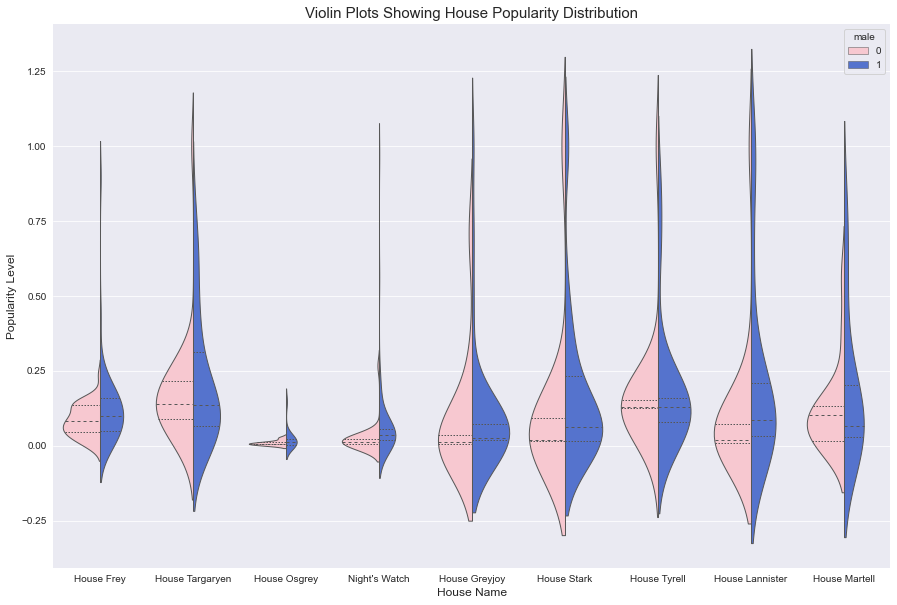

In [23]:
fig, ax = plt.subplots(figsize=(15,10))

sns.violinplot(data=plot, x='house', y='popularity',hue='male',
              split=True, inner='quart', linewidth=1,
              palette={1:"royalblue",0:'pink'}, ax=ax)

ax.set_title('Violin Plots Showing House Popularity Distribution', fontsize=15)
ax.set_xlabel('House Name', fontsize=12)
ax.set_ylabel('Popularity Level', fontsize=12)

sns.despine(left=True)

Filtering the data for the top 9 counted families in the Game of Thrones series, I have created a violin plot to show the distribution in popularity between each house and the gender distributions within those houses.

The chart shows the largest range in popularity from House Lannister ranging from zero to one. If you have watched the series, it is fairly known that the Lannisters are disliked within the Kingdom, therefore the number of connections they have to other characters in the book will be limited resulting in a lower popualrity score on this measure. Interestingly the only charachters from this house with a popularity of 1 are Jamie and Cersei, arguably the most hated characters in the series. But this is linked to the number of interactions they have with other charachters within the series as they play very crucial roles within the storyline.

The areas of each plot, both pink and blue are fairly equal, indicating that there are approximately even numbers of males and females in the chosen houses. Looking at each house, there are 7 houses following similar trends in House Stark, Tyrell, Watch, Greyjoy, Lannister, Osgrey and Frey who all appear to have higher popularity in their male charachters with the median and upper quartlie level of popularity slightly higher in each distribution. The other houses, Targaryen and Martell appear to have slightly more popular female charachters. This is expected as Daenerys, arguably the most popular character in the story is female, and has many female companions. 

The plot with the lowest range is House Osprey which coincidentally has the lowest number of members in this plot. Here the range is between 0 and 0.2 with the larger portion of charachters being male. These charachters are also slightly more popular but follow the general trend from the other plots that they are only 0.05 or less more popular than their female house counterparts. 

# Problem 3.3

In [24]:
import os
os.environ['PROJ_LIB'] = '/Users/Callu/anaconda3/envs/basemap-env/Library/share/'
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [25]:
# Import data
os.chdir("C:/Users/\Callu/OneDrive/Documents/FINAL YEAR/Data Science/Final Project/data")
persons = pd.read_csv('person_2020_update.csv')

C:\Users\Callu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
# Filter data for born after 1920
data = persons[(persons['birthyear'] > 1920)]
data = data[['id','name','bplace_lat','bplace_lon','dplace_lat','dplace_lon']]
data = data.dropna()

In [27]:
# Extract the data we're interested in
blat = data['bplace_lat'].values
blon = data['bplace_lon'].values
dlat = data['dplace_lat'].values
dlon = data['dplace_lon'].values

C:\Users\Callu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


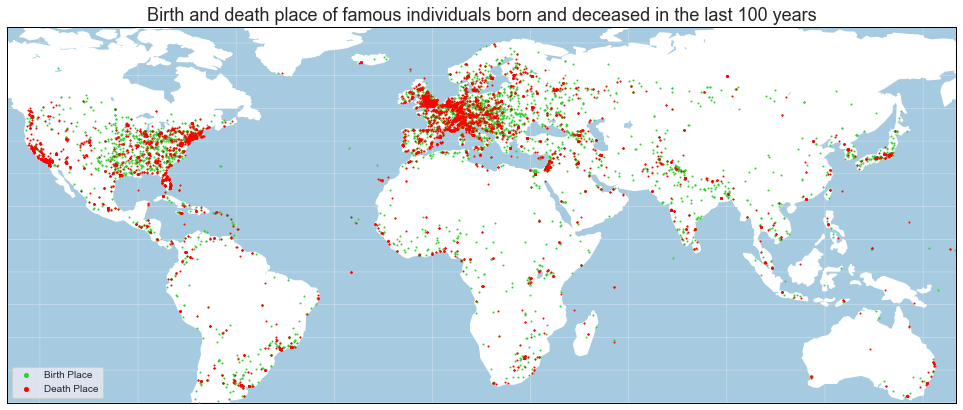

In [28]:
# Set the plot size for this notebook:
plt.rcParams["figure.figsize"]=17,15

# Always start witht the basemap function to initialize a map
m = Basemap(llcrnrlon=-130, llcrnrlat=-40,urcrnrlon=160,urcrnrlat=75)
 
# Background color:
m.drawmapboundary(fill_color='#A6CAE0')

# Continent in green
m.fillcontinents(color='white',lake_color='#A6CAE0')

# Show the coast lines in black
m.drawcoastlines(color='white', linewidth=2)

m.drawparallels(np.arange(-90,90,10), color='white', linewidth=0.5)
m.drawmeridians(np.arange(-180,180,30), color='white', linewidth=0.5) 

x, y = m(blon, blat)  # transform coordinates
x1,y1 = m(dlon, dlat)

plt.scatter(x, y, s=1, color='limegreen', zorder=2, label='Birth Place') 
plt.scatter(x1, y1, s=1, color='red', zorder=3, label='Death Place') 

plt.title('Birth and death place of famous individuals born and deceased in the last 100 years', size=18)
plt.legend(loc='lower left', markerscale=4)

plt.show()

# Question 3.3B

In [29]:
# Create new filtered dataframe
popularity = persons[['id','name','occupation','bplace_name','bplace_lat','bplace_lon','dplace_name','dplace_lat','dplace_lon','hpi']]
popularity = popularity.dropna()

In [30]:
# View number of occupations in dataframe
occupation = popularity.groupby(['occupation']).size().reset_index(name='counts')
occupation.sort_values(by=['counts'])

,occupation,counts
83,RUGBY PLAYER,1
9,BADMINTON PLAYER,1
14,BULLFIGHTER,1
99,YOUTUBER,2
72,POKER PLAYER,2
...,...,...
89,SOCCER PLAYER,1472
82,RELIGIOUS FIGURE,1641
0,ACTOR,2595
98,WRITER,4014


In [31]:
# Filter two occupations for chart
p1 = popularity[(popularity['occupation'] == 'PIRATE')]
p2 = popularity[(popularity['occupation'] == 'SWIMMER')]

In [32]:
df = p1[['bplace_name','bplace_lon','bplace_lat','dplace_lon','dplace_lat']]
df.columns = ['name', 'blon', 'blat','dlon','dlat']
df = df.reset_index(drop=True)

df1 = p2[['bplace_name','bplace_lon','bplace_lat','dplace_lon','dplace_lat']]
df1.columns = ['name', 'blon', 'blat','dlon','dlat']
df1 = df1.reset_index(drop=True)

In [33]:
# Remove warnings created by for loop
import warnings
warnings.filterwarnings('ignore')

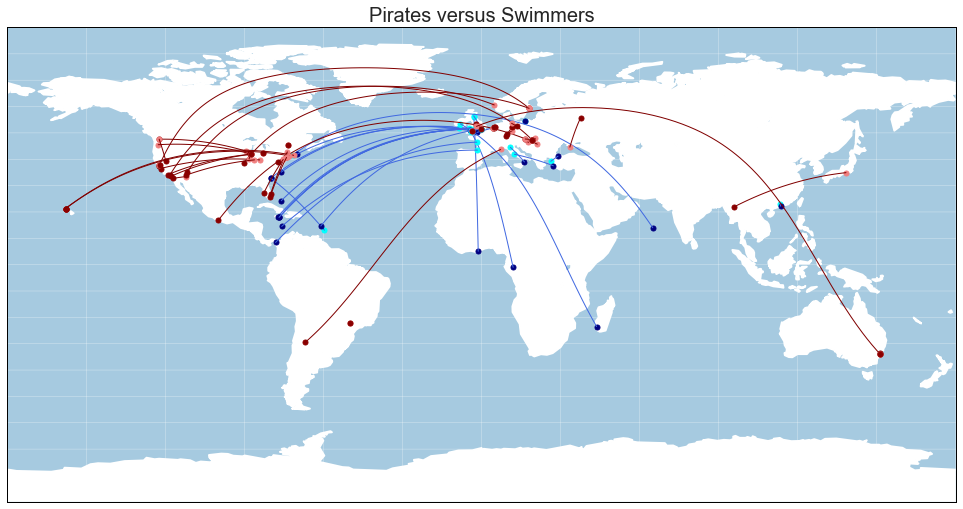

In [34]:
# Set the plot size for this notebook:
plt.rcParams["figure.figsize"]=17,15

# Always start witht the basemap function to initialize a map
m = Basemap(llcrnrlon=-180, llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)
 
# Background color:
m.drawmapboundary(fill_color='#A6CAE0')

# Continent in green
m.fillcontinents(color='white',lake_color='#A6CAE0')

# Show the coast lines in black
m.drawcoastlines(color='white', linewidth=2)

m.drawparallels(np.arange(-90,90,10), color='white', linewidth=0.5)
m.drawmeridians(np.arange(-180,180,30), color='white', linewidth=0.5) 

# SWIMMER
for blat, blon, dlat, dlon in zip(df.blat, df.blon, df.dlat, df.dlon):
    x,y = m(blon, blat)
    x2,y2 = m(dlon, dlat)
    m.plot(x, y, marker='.', color='aqua', markersize=10)
    m.plot(x2, y2, marker='.', color='navy', markersize=10)
    line, = m.drawgreatcircle(blon, blat, dlon, dlat, linewidth=1, color='royalblue')
    
    p = line.get_path()
    # find the index which crosses the dateline (the delta is large)
    cut_point = np.where(np.abs(np.diff(p.vertices[:, 0])) > 200)[0]
    if cut_point:
        cut_point = cut_point[0]

        # create new vertices with a nan inbetween and set those as the path's vertices
        new_verts = np.concatenate(
                                   [p.vertices[:cut_point, :], 
                                    [[np.nan, np.nan]], 
                                    p.vertices[cut_point+1:, :]]
                                   )
        p.codes = None
        p.vertices = new_verts



# SWIMMER
for blat, blon, dlat, dlon in zip(df1.blat, df1.blon, df1.dlat, df1.dlon):
    x,y = m(blon, blat)
    x2,y2 = m(dlon, dlat)
    m.plot(x, y, marker='.', color='lightcoral', markersize=10)
    m.plot(x2, y2, marker='.', color='darkred', markersize=10)
    line1, = m.drawgreatcircle(blon, blat, dlon, dlat, linewidth=1, color='maroon')
    
    p = line1.get_path()
    # find the index which crosses the dateline (the delta is large)
    cut_point = np.where(np.abs(np.diff(p.vertices[:, 0])) > 200)[0]
    if cut_point:
        cut_point = cut_point[0]

        # create new vertices with a nan inbetween and set those as the path's vertices
        new_verts = np.concatenate(
                                   [p.vertices[:cut_point, :], 
                                    [[np.nan, np.nan]], 
                                    p.vertices[cut_point+1:, :]]
                                   )
        p.codes = None
        p.vertices = new_verts
     
plt.title('Pirates versus Swimmers', size=20)

plt.show()


The final plot of question 3 shows the birth place and death place of two chosen occuaptions, Swimmers and Pirates between the years -3501 and 2020. The lines represent the distance they travelled between their birth location and death location. The red lines indicates Swimmers and the blue lines are Pirates.

Looking at the blue lines on the chart, it is clear that most pirates originated from Europe (light blue dots) and over the course of their life, set sail for other terrorities, mainly the Carribean and Africa (dark blue dots) where they died. Interestingly only two pirates in the whole of the database, William Kidd and Henry Every were the only two pirates to die in the country they were born in, the United Kingdom, compared to every other pirate setting sail for a new home. 

The two most common death locations for pirates were Jamaica and the US. Both of these countries were very rich in commodities centuries ago and were very common places for pirates to set sail in order to find successful trade. 

Swimmers on the other hand were most likely to die in the same country they were born in. The chart shows this as both red circle overlapping each other which is hard to see but 71% of swimmers died in the same country they were born in. The majority of these swimmers were born in the United States, arguably one of the best swimming nations in the world, breeding swimmers such as Michael Phelps. 

From the chart it appears many swimmers moved from the centre East states such as New York and Illinois, over to the warmer state of California, a traditonal US retirement state. This trend was also seen across Europe with a few swimmers from Sweden, Norway and the UK all moving over to California where they died. This could be correlated to the warmer weather and happy retirement or potentially swimmers joining a US team or training camp during their career and staying in that loaction for the rest of their lives, resulting in the chosen location for retirement. This was also seen with one UK swimmer moving to Australia where they died, another strong swimming nation, known for it's hot weather and happy retirement. 